In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot 

sns.set()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AY0e-g4LuQo0p79TE64jzCgUq0VnpcZZDvLJCFJe3wcfQrGr_vSRw3nhNd8
Mounted at /content/drive


In [38]:
data = pd.read_csv("/content/drive/My Drive/EDM/cataract.csv")

In [39]:
pd.set_option('display.max_columns', None)

In [40]:
data.head()

,Age(years),Education,Occupation,Marital Status,Ethnicity,Religion,Weight(kg),Height(metres),BMI Class,Use Lenses,Family History,Smoking,Smoke Frequency,High Cholesterol,Diabetes,Hypertension,Hypertensive,Corticosteroid medications,Past Eye surgery,Hormone Replacement,Have Myopia,Myopia intensity,Alcohol,Alcohol frequency,Risk of cataracts
0,19 to 35,University,Military,Married,Ibo,Islam,78,1.70,Overweight,No,No,Yes,Pack/week,No,Yes,No,No,No,Yes,No,No,Nil,Yes,Weekly,Low
1,19 to 35,University,Civil servant,Married,Yoruba,Christianity,70,1.55,Overweight,No,No,Yes,Pack/month,Yes,Yes,No,No,No,Yes,No,Yes,High,Yes,Weekly,Moderate
2,Above 35,Polytechnic,Self,Married,Ibo,Christianity,85,1.53,Obese,Yes,No,Yes,Pack/month,No,Yes,No,No,No,Yes,No,No,Nil,Yes,Weekly,Low
3,19 to 35,University,Student,Single,Ibo,Christianity,84,1.65,Obese,Yes,No,Yes,Pack/week,No,Yes,No,Yes,No,No,No,No,Nil,Yes,Weekly,Moderate
4,Below 10,Primary,Student,Single,Yoruba,Christianity,51,1.22,Obese,Yes,First generation,No,Nil,No,No,No,No,No,No,No,Yes,High,No,Nil,Low


In [41]:
#Data preprocessing

#To check variables data type
print(data.info())

#Checking missing values
data.isnull()

print('Data columns with null values:\n',data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age(years)                  93 non-null     object 
 1   Education                   93 non-null     object 
 2   Occupation                  93 non-null     object 
 3   Marital Status              93 non-null     object 
 4   Ethnicity                   93 non-null     object 
 5   Religion                    93 non-null     object 
 6   Weight(kg)                  93 non-null     int64  
 7   Height(metres)              93 non-null     float64
 8   BMI Class                   93 non-null     object 
 9   Use Lenses                  93 non-null     object 
 10  Family History              93 non-null     object 
 11  Smoking                     93 non-null     object 
 12  Smoke Frequency             93 non-null     object 
 13  High Cholesterol            93 non-nu

In [42]:
#Summary of numerical variables
summary_num = data.describe()
print(summary_num)

#Summary of categorical variables
summary_cat = data.describe(include="O")
print(summary_cat)

       Weight(kg)  Height(metres)
count   93.000000       93.000000
mean    72.193548        1.549032
std     11.167945        0.120444
min     50.000000        1.220000
25%     60.000000        1.420000
50%     75.000000        1.570000
75%     80.000000        1.650000
max     88.000000        1.700000
       Age(years)   Education Occupation Marital Status Ethnicity  \
count          93          93         93             93        93   
unique          4           4          7              2         2   
top      19 to 35  University     Trader        Married    Yoruba   
freq           48          39         45             48        66   

            Religion BMI Class Use Lenses Family History Smoking  \
count             93        93         93             93      93   
unique             2         3          2              2       2   
top     Christianity     Obese         No             No      No   
freq              57        48         69             75      48   

       

In [43]:
#Data visualization/Exploratory analysis

#Relationship between independent variables
correlation = data.corr()

#Extracting the column names
data.columns

#Numerical Data Analysis
num_attributes = data.select_dtypes(include=['float64'])
print(num_attributes.columns)


cat_attributes = data.select_dtypes(include=['object'])
print(cat_attributes.columns)

Index(['Height(metres)'], dtype='object')
Index(['Age(years)', 'Education', 'Occupation', 'Marital Status', 'Ethnicity',
       'Religion', 'BMI Class', 'Use Lenses', 'Family History', 'Smoking',
       'Smoke Frequency', 'High Cholesterol', 'Diabetes', 'Hypertension',
       'Hypertensive', 'Corticosteroid medications', 'Past Eye surgery',
       'Hormone Replacement', 'Have Myopia', 'Myopia intensity', 'Alcohol',
       'Alcohol frequency', 'Risk of cataracts'],
      dtype='object')


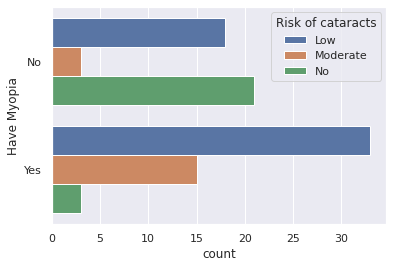

In [46]:
#Myopia_Cataract
Myopia = pd.crosstab( index = data["Have Myopia"], columns = 'count', normalize = True)
Myopia_Cataract = pd.crosstab( index = data["Have Myopia"],columns = data["Risk of cataracts"], normalize = 'index', margins = True)
sns.countplot(y='Have Myopia', hue='Risk of cataracts', data = cat_attributes)

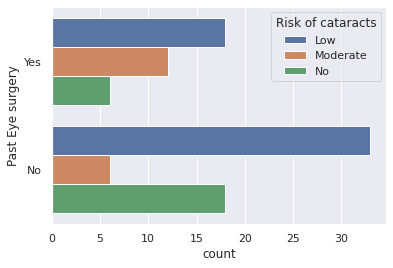

In [47]:
#Myopia_Past Eye Surgery
PastEyeSurgery = pd.crosstab( index = data["Past Eye surgery"], columns = 'count', normalize = True)
Surgery_Cataract = pd.crosstab( index = data["Past Eye surgery"],columns = data["Risk of cataracts"], normalize = 'index', margins = True)
sns.countplot(y='Past Eye surgery', hue='Risk of cataracts', data = cat_attributes)



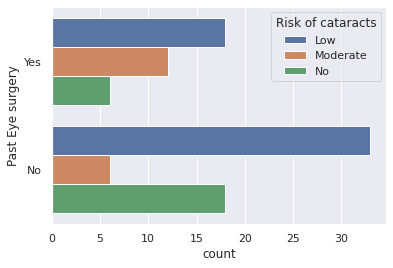

In [48]:
#Myopia_Past Eye Surgery
PastEyeSurgery = pd.crosstab( index = data["Past Eye surgery"], columns = 'count', normalize = True)
Surgery_Cataract = pd.crosstab( index = data["Past Eye surgery"],columns = data["Risk of cataracts"], normalize = 'index', margins = True)
sns.countplot(y='Past Eye surgery', hue='Risk of cataracts', data = cat_attributes)



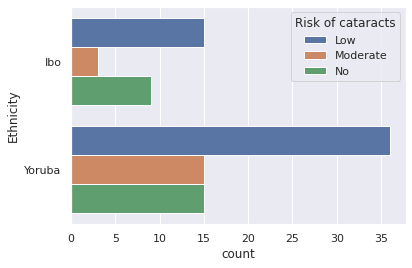

In [49]:
#Myopia_Past Eye Surgery
Ethnicity = pd.crosstab( index = data["Ethnicity"], columns = 'count', normalize = True)
Ethnicity_Cataract = pd.crosstab( index = data["Ethnicity"],columns = data["Risk of cataracts"], normalize = 'index', margins = True)
sns.countplot(y='Ethnicity', hue='Risk of cataracts', data = cat_attributes)



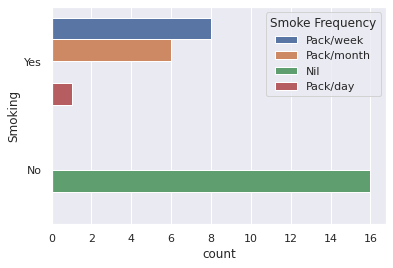

In [29]:
#Myopia_Past Eye Surgery
Smoking = pd.crosstab( index = data["Smoking"], columns = 'count', normalize = True)
Smoking_Frequency = pd.crosstab( index = data["Smoking"],columns = data["Smoke Frequency"], normalize = 'index', margins = True)
sns.countplot(y='Smoking', hue='Smoke Frequency', data = cat_attributes)

In [50]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Risk of cataracts']= label_encoder.fit_transform(data['Risk of cataracts'])

new_data=pd.get_dummies(data,drop_first=True)

#Storing the column names
columns_list=list(new_data.columns)
print(columns_list)

#Separating the input names from data
features=list(set(columns_list)-set(['Risk of cataracts']))
print(features)

['Weight(kg)', 'Height(metres)', 'Risk of cataracts', 'Age(years)_19 to 35', 'Age(years)_Above 35', 'Age(years)_Below 10', 'Education_Primary', 'Education_Secondary', 'Education_University', 'Occupation_Civil servant', 'Occupation_Military', 'Occupation_Self', 'Occupation_Student', 'Occupation_Teacher', 'Occupation_Trader', 'Marital Status_Single', 'Ethnicity_Yoruba', 'Religion_Islam', 'BMI Class_Obese', 'BMI Class_Overweight', 'Use Lenses_Yes', 'Family History_No', 'Smoking_Yes', 'Smoke Frequency_Pack/day', 'Smoke Frequency_Pack/month', 'Smoke Frequency_Pack/week', 'High Cholesterol_Yes', 'Diabetes_Yes', 'Hypertension_Yes', 'Hypertensive_Yes', 'Corticosteroid medications_Yes', 'Past Eye surgery_Yes', 'Hormone Replacement_Yes', 'Have Myopia_Yes', 'Myopia intensity_Low', 'Myopia intensity_Moderate', 'Myopia intensity_Nil', 'Alcohol_Yes', 'Alcohol frequency_Monthly', 'Alcohol frequency_Nil', 'Alcohol frequency_Weekly']
['Ethnicity_Yoruba', 'Past Eye surgery_Yes', 'Hormone Replacement_Yes

In [51]:
#Storing the values from input features
x=new_data[features].values
print(x)

#Storing the output values in y
y=new_data['Risk of cataracts'].values
print(y)

#To partition the data
from sklearn.model_selection import train_test_split

#Splitting the data into train and test
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 1. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 1. 1. 0.]]
[0 1 0 1 0 0 2 1 1 1 0 0 0 0 2 0 0 0 0 0 0 2 1 0 2 2 0 2 2 0 2 0 1 0 1 0 0
 2 1 1 1 0 0 0 0 2 0 0 0 0 0 0 2 1 0 2 2 0 2 2 0 2 0 1 0 1 0 0 2 1 1 1 0 0
 0 0 2 0 0 0 0 0 0 2 1 0 2 2 0 2 2 0 2]


In [61]:
#Importing library for logistic regression
from sklearn.linear_model import LogisticRegression

#Importing performance metrics - accuracy score & confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix


# Make an instance of the Model
logistic = LogisticRegression()

# Fitting the vakues for x and y
logistic.fit(train_x,train_y)
logistic.coef_
logistic.intercept_

# Prediction from test data
prediction1 = logistic.predict(test_x)
print(prediction1)

# Confusion matrix3
confusion_matrix1= confusion_matrix(test_y,prediction1)
print(confusion_matrix1)

# Accuracy calculation
accuracy_score1 = accuracy_score(test_y,prediction1)
print(accuracy_score1)

from sklearn.metrics import recall_score

# Accuracy calculation
recall_score1 = recall_score(test_y,prediction1, average='macro')
print(recall_score1)

[0 0 2 0 0 0 0 2 0 0 0 1 2 0 0 2 1 0 2 0 0 0 2 2 0 1 0 0]
[[14  0  0]
 [ 1  3  0]
 [ 3  0  7]]
0.8571428571428571
0.8166666666666668


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [62]:
# KNN Classifier

# importing library for KNN
from sklearn.neighbors import KNeighborsClassifier

# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 18)

# Fitting the values for x and y
KNN_classifier.fit(train_x,train_y)

# Predicting the test values with model
prediction2 = KNN_classifier.predict(test_x)

# Performance metric check
confusion_matrix2 = confusion_matrix(test_y,prediction2)
print("\t","Predicted values")
print("Original values","\n",confusion_matrix2)

# Accuracy calculation
accuracy_score2 = accuracy_score(test_y,prediction2)
print(accuracy_score2)

# Missclassified values from prediction
print("Missclassified samples : %d" % (test_y != prediction2).sum())

# Accuracy calculation
recall_score2 = recall_score(test_y,prediction1, average='macro')
print(recall_score2)

	 Predicted values
Original values 
 [[14  0  0]
 [ 4  0  0]
 [10  0  0]]
0.5
Missclassified samples : 14
0.8166666666666668


In [56]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 10)

# Train the model on training data
rf.fit(train_x, train_y)

# Use the forest's predict method on the test data
prediction3 = rf.predict(test_x)
print(prediction3)
prediction3= np.around(prediction3)

prediction3 = prediction3.astype(int)
print(prediction3)

# Confusion matrix
confusion_matrix3= confusion_matrix(test_y,prediction3)
print(confusion_matrix3)

# Accuracy calculation
accuracy_score3 = accuracy_score(test_y,prediction3)
print(accuracy_score3)

# Calculate the absolute errors
errors = abs(prediction3 - test_y)
print(errors)

# Missclassified values from prediction
print("Missclassified samples : %d" % (test_y != prediction3).sum())

[0.1 1.4 1.5 0.1 0.  0.4 1.4 1.7 0.1 0.  0.1 0.8 2.  0.  0.  1.8 0.7 1.
 2.  1.4 0.1 0.2 1.5 2.  0.2 0.8 0.2 0. ]
[0 1 2 0 0 0 1 2 0 0 0 1 2 0 0 2 1 1 2 1 0 0 2 2 0 1 0 0]
[[14  0  0]
 [ 0  4  0]
 [ 0  3  7]]
0.8928571428571429
[0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Missclassified samples : 3
